In [15]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 



In [40]:
mpg_dataset= pd.read_csv('cars-dataset.csv')

In [41]:
mpg_dataset.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [42]:
mpg_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [43]:
mpg_dataset = mpg_dataset.replace('?', np.nan)

In [44]:
mpg_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [45]:
mpg_dataset['hp'].median()

93.5

In [46]:
mpg_dataset['hp']=mpg_dataset['hp'].fillna(mpg_dataset['hp'].median(),axis=0)

In [47]:
mpg_dataset['hp'] = mpg_dataset['hp'].astype('float64')

In [48]:
mpg_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [54]:
mpg_dataset=mpg_dataset.drop('car name', axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


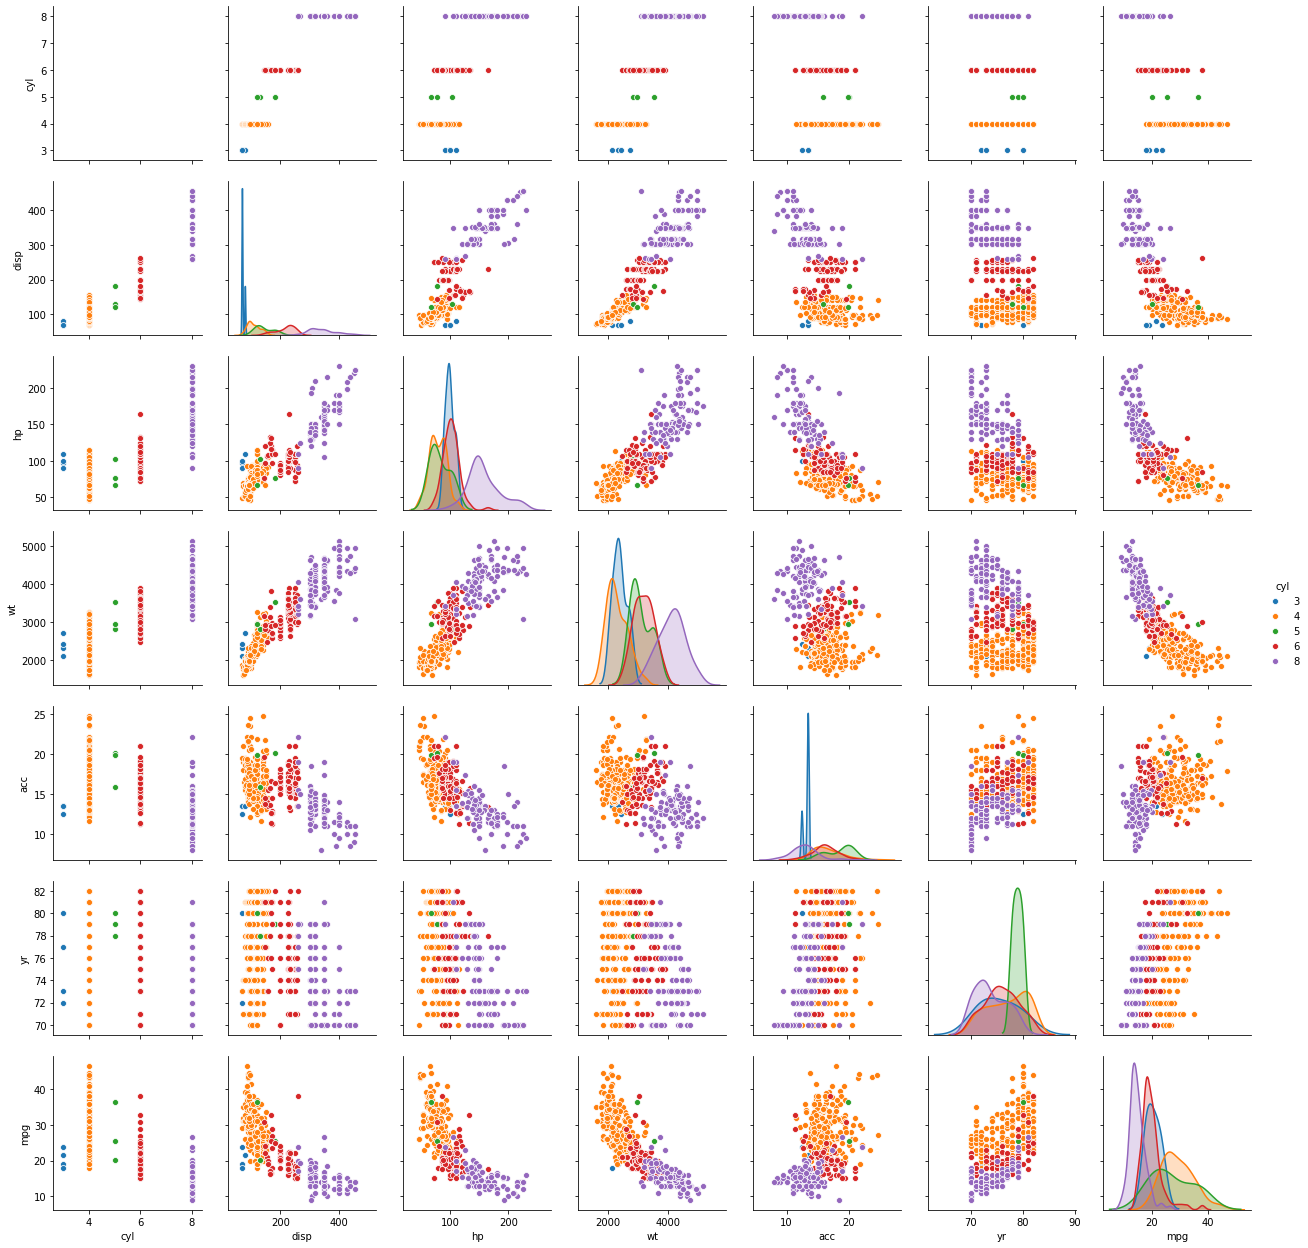

In [55]:
sns.pairplot(mpg_dataset, diag_kind='kde', hue = 'cyl')

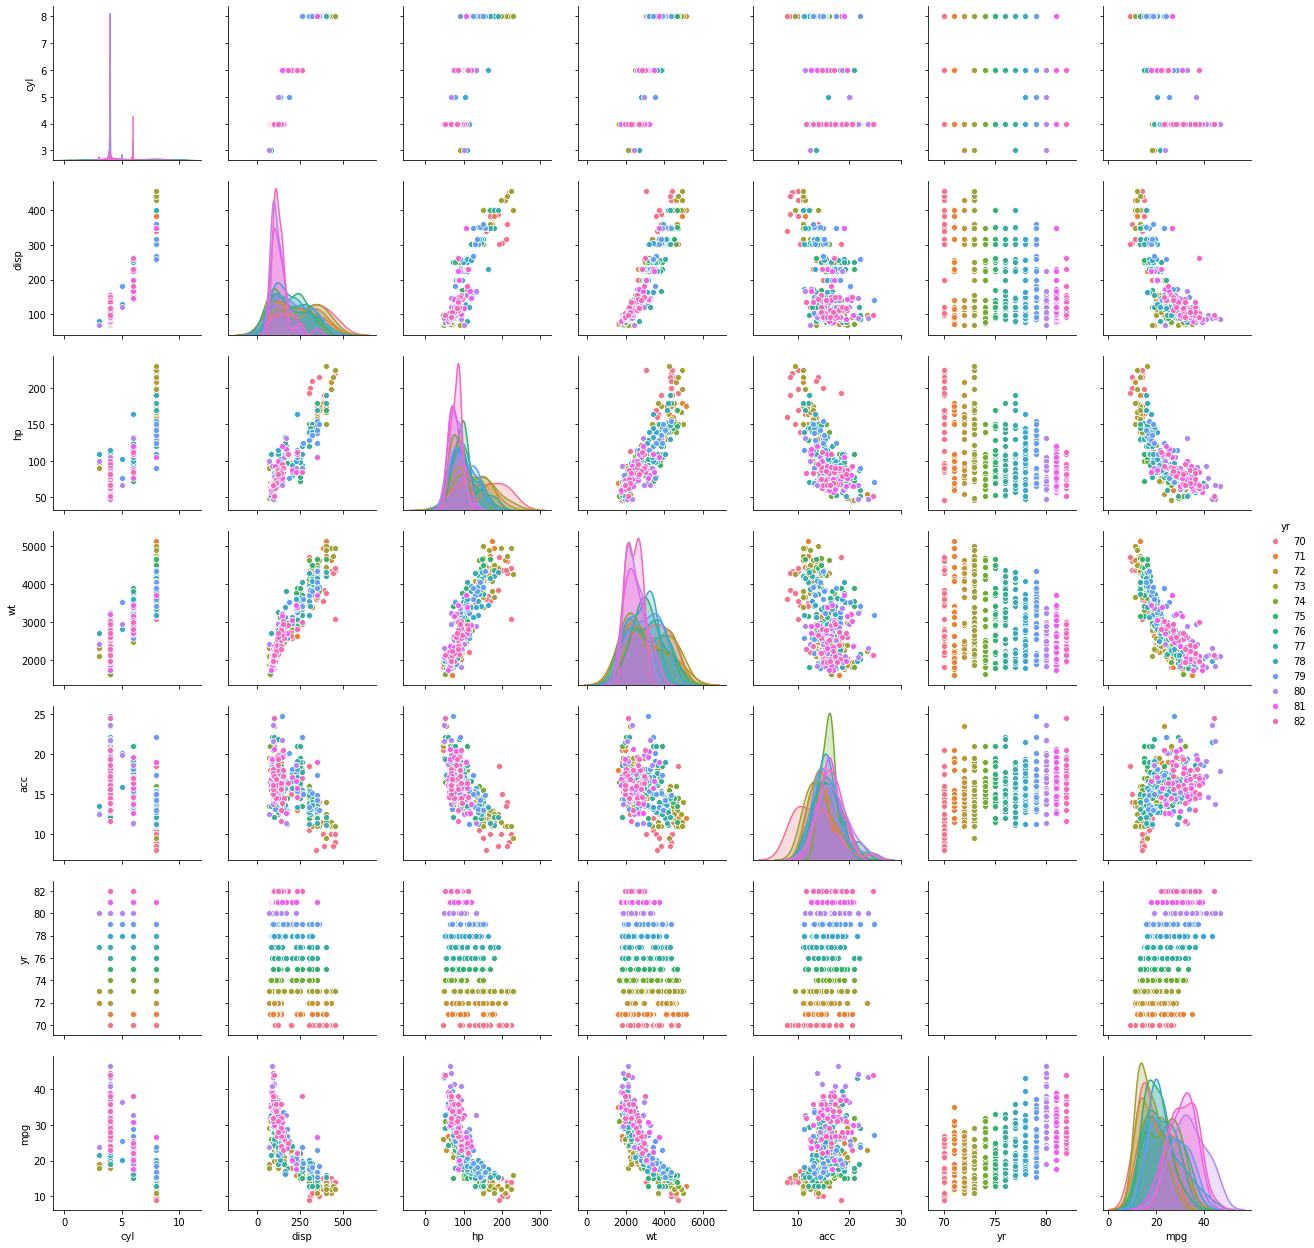

In [57]:
sns.pairplot(mpg_dataset, diag_kind='kde', hue = 'yr')

In [59]:
from scipy.stats import zscore

mpg_df_attr_z = mpg_dataset.apply(zscore)

# Remove "origin" and "yr" columns
mpg_df_attr_z.pop('yr')

array = mpg_df_attr_z.values

In [60]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(mpg_dataset)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.428941e+07
1,3,3.420799e+07
2,4,1.905160e+07
3,5,1.376961e+07


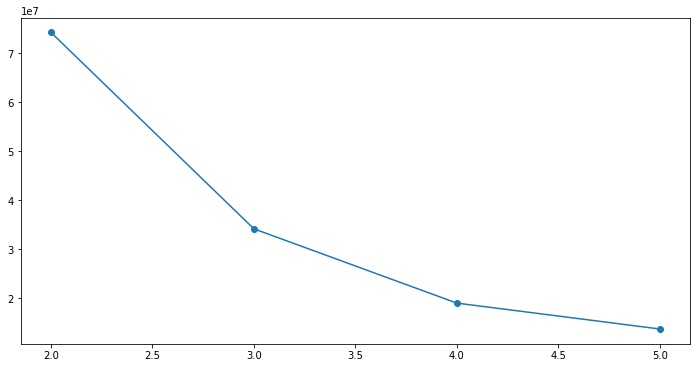

In [61]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [62]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(mpg_df_attr_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [63]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.4860546 ,  1.48450715,  1.50624078,  1.38753374, -1.06267868,
        -1.15110476],
       [-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.75394661],
       [ 0.34598334,  0.23689416, -0.06773972,  0.29795187,  0.30089004,
        -0.47244453]])

In [64]:
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr_z) )
centroid_df

,cyl,disp,hp,wt,acc,mpg
0,1.486055,1.484507,1.506241,1.387534,-1.062679,-1.151105
1,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,0.753947
2,0.345983,0.236894,-0.067740,0.297952,0.300890,-0.472445


In [65]:
prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001480E6EDA20>,
      dtype=object)

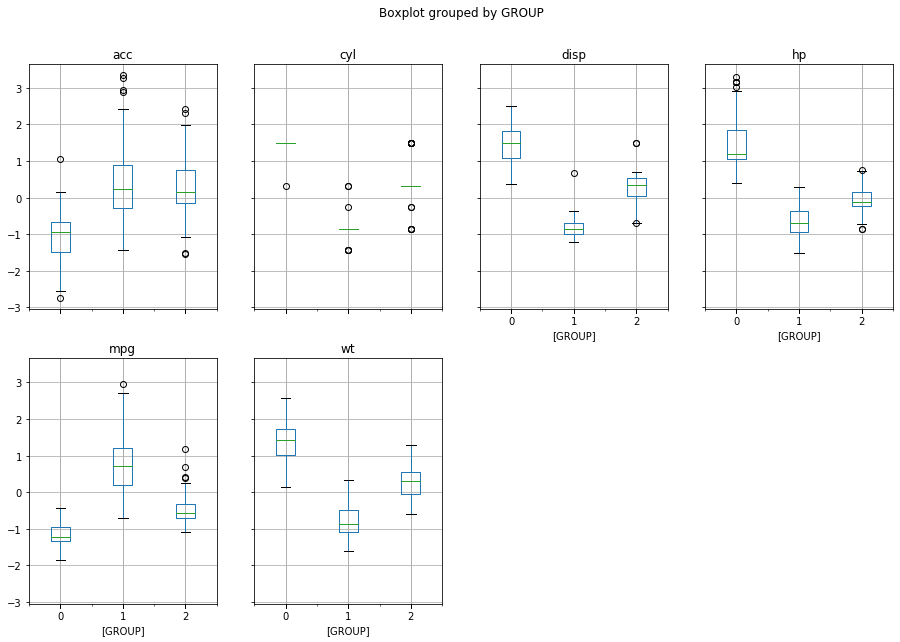

In [66]:
import matplotlib.pylab as plt

mpg_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))


In [116]:
grp1=pd.DataFrame((mpg_df_attr_z[mpg_df_attr_z['GROUP']==0]))

In [121]:
grp2=pd.DataFrame((mpg_df_attr_z[mpg_df_attr_z['GROUP']==1]))

In [110]:
grp3=pd.DataFrame((mpg_df_attr_z[mpg_df_attr_z['GROUP']==2]))

In [119]:
from sklearn.linear_model import LinearRegression
X = grp1.iloc[:,0:5]
y=grp1.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
regression_model1 = LinearRegression()

regression_model1.fit(X_train, y_train)

print(regression_model1.score(X_train, y_train))
print(regression_model1.score(X_test, y_test))
coeff1 = pd.DataFrame(regression_model1.coef_,X.columns,columns=['Coefficient'])
coeff1


0.4862181303124734
0.08740725376233471


,Coefficient
cyl,-0.385947
disp,0.143230
hp,-0.250306
wt,-0.194137
acc,-0.067194


In [122]:
grp2.pop('GROUP')
X1= grp2.iloc[:,0:5]
y1=grp2.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=1)
regression_model2 = LinearRegression()

regression_model2.fit(X_train, y_train)

print(regression_model2.score(X_train, y_train))
print(regression_model2.score(X_test, y_test))
coeff1 = pd.DataFrame(regression_model2.coef_,X.columns,columns=['Coefficient'])
coeff1

0.4069369375896391
0.21169777242455545


,Coefficient
cyl,1.110159
disp,-0.162866
hp,-0.855753
wt,-0.410378
acc,-0.044164


In [123]:
grp3.pop('GROUP')
X2= grp3.iloc[:,0:5]
y2=grp3.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=1)
regression_model3 = LinearRegression()

regression_model3.fit(X_train, y_train)

print(regression_model3.score(X_train, y_train))
print(regression_model3.score(X_test, y_test))

coeff1 = pd.DataFrame(regression_model3.coef_,X.columns,columns=['Coefficient'])
coeff1

0.3514146822442489
0.012043404594116791


,Coefficient
cyl,0.389858
disp,-0.283425
hp,0.189930
wt,-0.431428
acc,0.005197
